In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV


In [ ]:
from google.colab import drive #country-wise split
drive.mount('/content/drive', force_remount = True)
data_dir = '/content/drive/My Drive/ - Project/368 Datasets'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv("{}/Australia - Sheet1.csv".format(data_dir))
df.columns = ['DATE','Exports','Gov_Spend','Imports','Inflation','Unemployment_Rate', 'Consumer_Spend','Interest_Rate','Interest_Prev_Quarter','AvgChange','IsCanada']
df.head() #recursive quarterly model (canada and australia)
df.dtypes


DATE                      object
Exports                    int64
Gov_Spend                  int64
Imports                    int64
Inflation                float64
Unemployment_Rate        float64
Consumer_Spend             int64
Interest_Rate            float64
Interest_Prev_Quarter    float64
AvgChange                float64
IsCanada                   int64
dtype: object

In [ ]:
#This is for comparing the trends in each feature betweeen Canada and Australia
dfaus = pd.DataFrame(df[0:84])
dfaus
dfcan = pd.DataFrame(df[84:])
dfcan.shape

(84, 11)

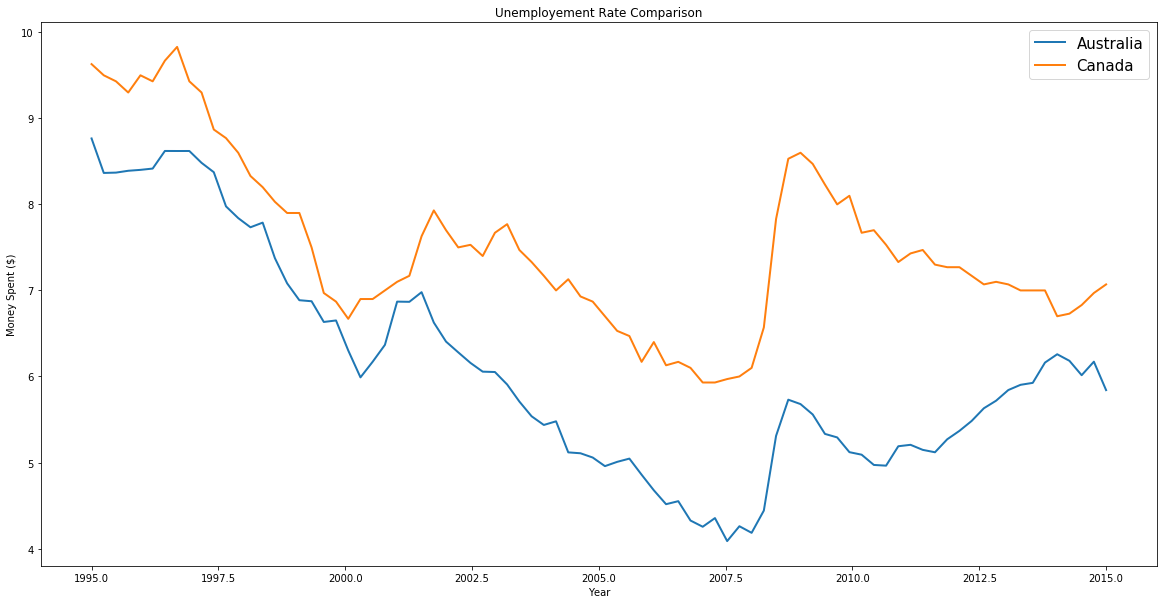

In [ ]:
#This is the plotting for trend comparison

fig, ax = plt.subplots()
x = np.linspace(1995, 2015, 84)
line1, = ax.plot(x, dfaus['Unemployment_Rate'], '-', linewidth=2,
                 label='Australia')

line2, = ax.plot(x, dfcan['Unemployment_Rate'], '-', linewidth=2,
                 label='Canada')

fig.set_size_inches(20, 10)
ax.legend(loc='upper right', prop={'size': 15})
plt.title('Unemployement Rate Comparison')
plt.xlabel('Year')
plt.ylabel('Money Spent ($)')

plt.show()



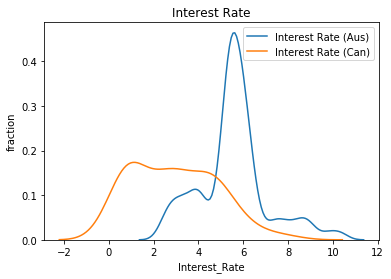

In [ ]:
#Dont know what this is. You made this.
sns.distplot(dfaus.Interest_Rate.dropna(),hist=False,label='Interest Rate (Aus)')
sns.distplot(dfcan.Interest_Rate.dropna(),hist=False,label='Interest Rate (Can)')
plt.legend()
plt.title('Interest Rate')
plt.ylabel('fraction')
plt.show()

In [ ]:
df1_N = df.copy()  #STANDADIZING all COLUMNS


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1_N[['Imports','Gov_Spend','Exports','Consumer_Spend']]=scaler.fit_transform(df1_N[['Imports','Gov_Spend','Exports','Consumer_Spend']].values)
df1_N.head()

,DATE,Exports,Gov_Spend,Imports,Inflation,Unemployment_Rate,Consumer_Spend,Interest_Rate,Interest_Prev_Quarter,AvgChange,IsCanada
0,1/1/1995,-1.528030,-1.595814,-1.027816,3.643297,8.766242,-1.460863,10.334500,10.334500,0.000000,0
1,4/1/1995,-1.512498,-1.547307,-1.026497,4.658415,8.365354,-1.460863,9.798824,10.334500,-0.267838,0
2,7/1/1995,-1.480605,-1.578175,-1.026058,5.167020,8.369201,-1.460863,9.081905,9.798824,-0.417532,0
3,10/1/1995,-1.484185,-1.520849,-1.026058,5.136147,8.390485,-1.460863,8.508636,9.081905,-0.608621,0
4,1/1/1996,-1.447857,-1.503210,-1.025178,3.993039,8.401121,-1.394852,8.112381,8.508636,-0.562148,0


In [ ]:
df_reduced1 = df1_N.copy()  #Ridge Regression model that we use.
df_train = df_reduced1[0:84]
df_test = df_reduced1[85:]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_Rate','Imports','Exports','DATE','Interest_Prev_Quarter'])
y_train = df_train.Interest_Rate

# Fit the model
ridge = RidgeCV()
ridge.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_Rate','Imports','Exports','DATE','Interest_Prev_Quarter'])
y_test = df_test.Interest_Rate

prediction = ridge.predict(X_test)


# calculate the score
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

# calculate betas
betas = pd.Series(ridge.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": ridge.intercept_}))
print(betas)

The train score is 0.7402033132961627 and the test score is 0.43586303152229233
Gov_Spend           -3.255759
Inflation            0.276712
Unemployment_Rate    0.153120
Consumer_Spend       1.619800
AvgChange            1.116966
IsCanada             0.000000
Intercept            3.123077
dtype: float64


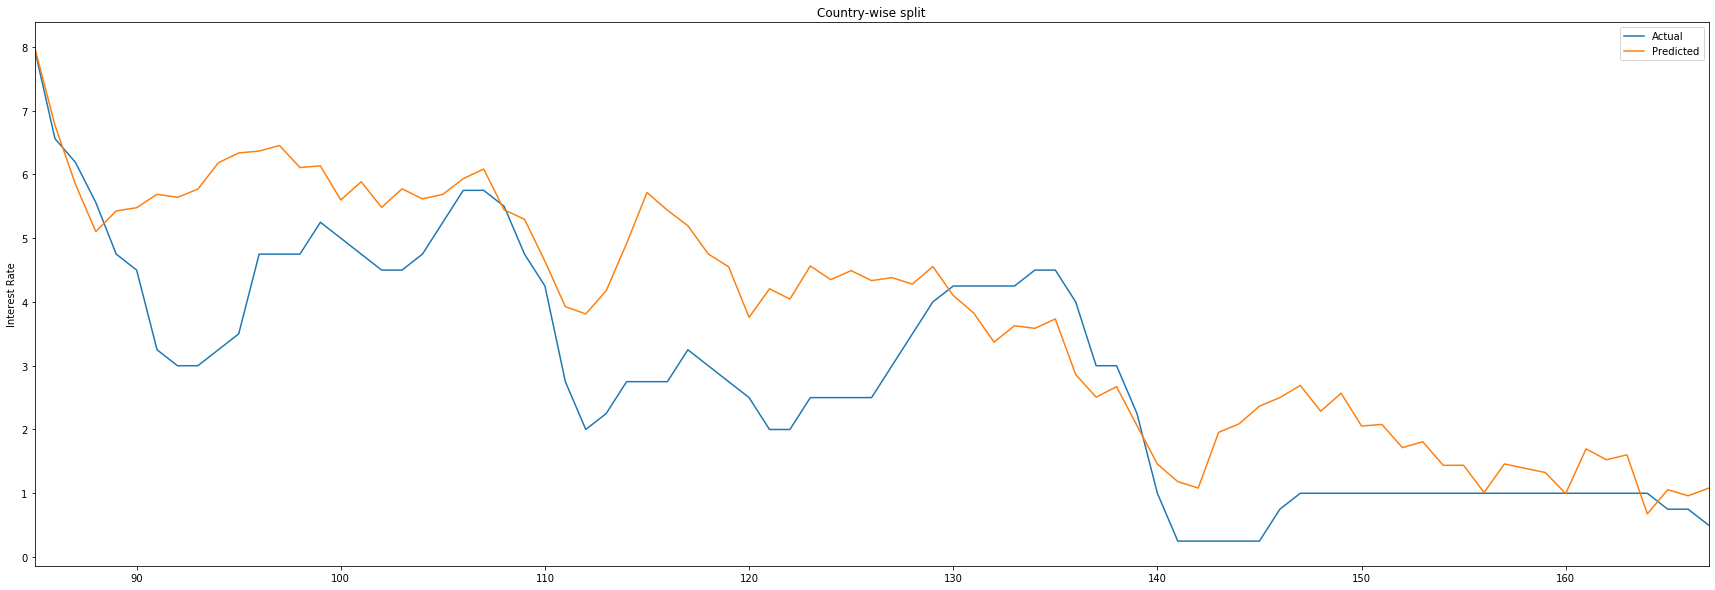

In [ ]:
#This is the graph from the country wise split.Trained on Australia, tested on Canada. This graph is for Canada.
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})


df_predict.plot(kind='line',figsize=(30,10))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("Interest Rate")
plt.title("Country-wise split")
plt.show()

In [ ]:
 26.95, 48.4#USING Crossvalidation to see how many estimataors we need for RF(RUNNING THIS WILL TAKE A WHILE) with dropped features

# We have made a copy of the data frame
df_reduced = df1_N.copy()

# Write your code here.
# -------------------


df_train = df_reduced[0:84]
df_test = df_reduced[85:]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_Rate','Imports','Exports','DATE'])
y_train = df_train.Interest_Rate



# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_Rate','Imports','Exports','DATE'])
y_test = df_test.Interest_Rate

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

# Initailize cross validation score DataFrame
depth_lb = 1
depth_ub = 200
cv_scores = pd.Series(index=np.arange(depth_lb, depth_ub))

for max_depth in range(depth_lb, depth_ub):
  
  # Initialize the model
  rf_cv1_model = RandomForestRegressor(n_estimators=max_depth, random_state=0)

  # Run cross validation to get measure of out-of-sample error
  example_cv_results = cross_validate(rf_cv1_model, X_train, y_train, cv=5)
  
  # Record the average out-of-sample error
  cv_scores.loc[max_depth] = example_cv_results['test_score'].mean()

161

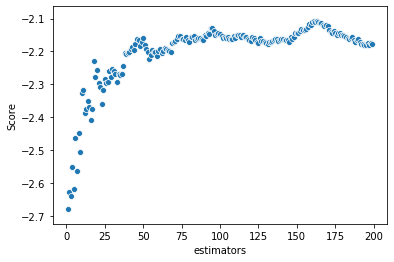

In [ ]:
#RUN THIS TO GET NUMBER OF ESTIMATORS


sns.scatterplot(x=cv_scores.index, y=cv_scores.values)
plt.xlabel('estimators')
plt.ylabel('Score')

maxnum=cv_scores.idxmax()
maxnum

In [ ]:
#FINALLY RUN RF   

df_train = df_reduced[0:84]
df_test = df_reduced[85:]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_Rate','DATE'])
y_train = df_train.Interest_Rate



# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_Rate','DATE'])
y_test = df_test.Interest_Rate

regressor = RandomForestRegressor(n_estimators=16, random_state=0, max_features= 0.9)
z = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# Predict the number of wins
#print(linreg_reduced.predict(X_test))

#test Scores:
train_score = regressor.score(X_train, y_train)
test_score = regressor.score(X_test, y_test)



print('\nThe train score is {} and the test score is {}'.format(train_score, test_score))




from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


The train score is 0.9880557063583469 and the test score is 0.03823859478156477
Mean Absolute Error: 1.4861933041280124
Mean Squared Error: 3.1557899349049134
Root Mean Squared Error: 1.776454315456751


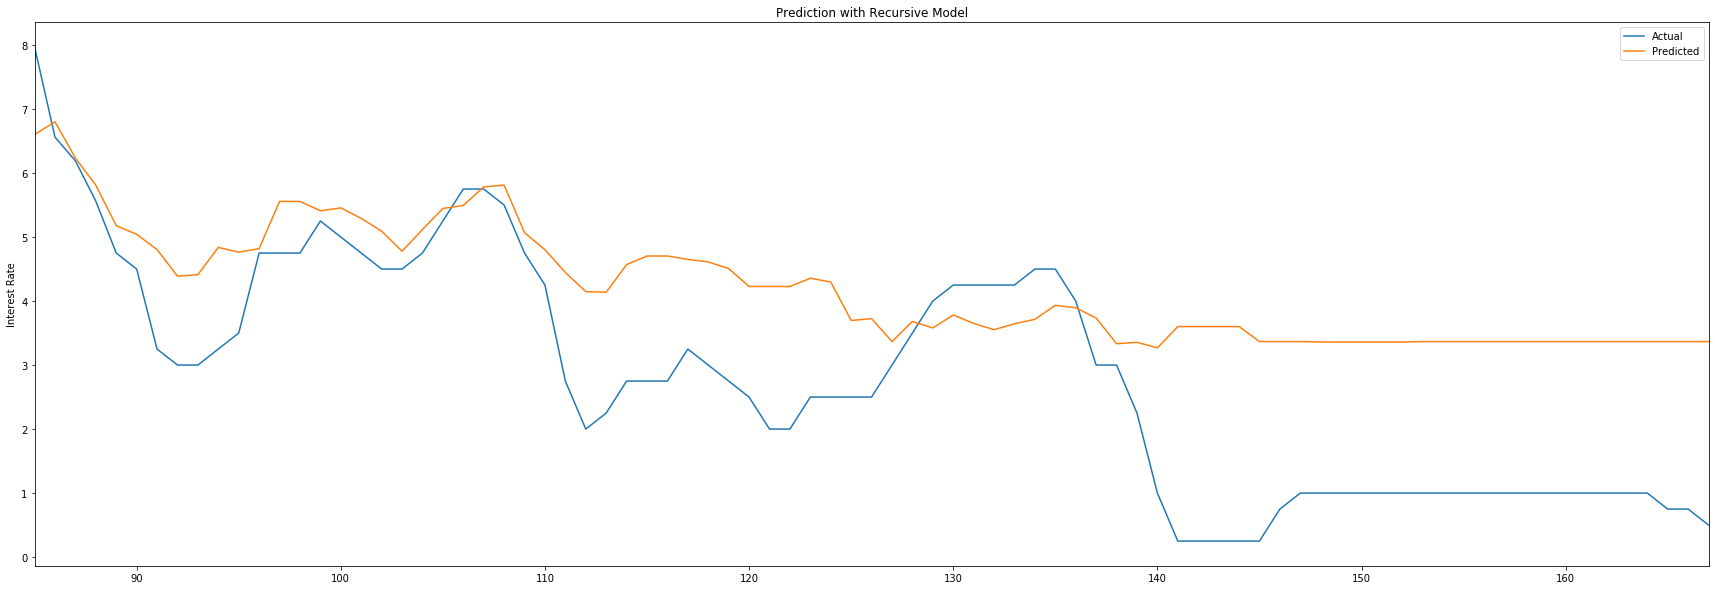

In [ ]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head()



df_predict.plot(kind='line',fig = 'o', figsize=(30,10))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("Interest Rate")
plt.title("Prediction with Recursive Model")
plt.show()

In [ ]:
df_reduced = df1.copy()  #linear regression model on SPLIT data on all features

# Write your code here.
# -------------------


df_train = df_reduced['1995-01-01':'2007-12-01']
df_test = df_reduced['2008-01-01':]


# Partition the training data into features and target
X_train = df_train.drop(columns=['Interest_rate'])
y_train = df_train.Interest_rate

# Fit the model
ridge = RidgeCV()
ridge.fit(X_train, y_train)

# Partition the testing data into features and target
X_test = df_test.drop(columns=['Interest_rate'])
y_test = df_test.Interest_rate

# Predict the number of wins
print(ridge.predict(X_test))

#test Scores:
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)


betas = pd.Series(ridge.coef_, index=X_train.columns)
betas = betas.append(pd.Series({"Intercept": ridge.intercept_}))
print(betas)
print('\nThe train score is {} and the test score is {}'.format(train_score, test_score))

TypeError: ignored